In [1]:
#Imports/Setup
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec #Subplot lib
import requests
import io #File I/O
from matplotlib.ticker import ScalarFormatter #Axis label reformat

In [2]:
#Grab data from API
base_url = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&"

data_2002 = requests.get(base_url + 
                         "starttime=2002-01-01&" + "endtime=2002-11-01&" + 
                         "minmagnitude=2.5&" + "maxmagnitude=5.0")
data_2009 = requests.get(base_url + 
                         "starttime=2009-01-01&" + "endtime=2009-11-01&" + 
                         "minmagnitude=2.5&" + "maxmagnitude=5.0")
data_2012 = requests.get(base_url + 
                         "starttime=2012-01-01&" + "endtime=2012-11-01&" + 
                         "minmagnitude=2.5&" + "maxmagnitude=5.0")
data_2017 = requests.get(base_url + 
                         "starttime=2017-01-01&" + "endtime=2017-11-01&" + 
                         "minmagnitude=2.5&" + "maxmagnitude=5.0")

data_decade = requests.get(base_url + 
                         "starttime=2007-01-01&" + "endtime=2017-01-01&" + 
                         "minmagnitude=5")
data_century = requests.get(base_url + 
                         "starttime=1907-01-01&" + "endtime=2017-01-01&" + 
                         "minmagnitude=6")
data_2010 = requests.get(base_url + 
                         "starttime=2010-01-01&" + "endtime=2010-09-01&" + 
                         "minmagnitude=2.5")
data_all = requests.get(base_url + 
                         "starttime=2010-01-01&" + "endtime=2010-04-01&")

In [3]:
#All global quakes with a magnitude of 2.5 to 5, from Jan to Nov
light_2002 = pd.read_csv(io.StringIO(data_2002.text))
light_2009 = pd.read_csv(io.StringIO(data_2009.text))
light_2012 = pd.read_csv(io.StringIO(data_2012.text))
light_2017 = pd.read_csv(io.StringIO(data_2017.text))
df_2010 = pd.read_csv(io.StringIO(data_2010.text))


#All global quakes with a magnitude of 5+, from Jan 2007 to Jan 2017
medium_decade = pd.read_csv(io.StringIO(data_decade.text))

#All global quakes with a magnitude of 6+, from Jan 1907 to Jan 2017
heavy_century = pd.read_csv(io.StringIO(data_century.text))

data_all_mags = pd.read_csv(io.StringIO(data_all.text))

In [5]:
#Reverse order
light_2002, light_2009, light_2012, light_2017, medium_decade, heavy_century = (light_2002[::-1], 
                                            light_2009[::-1], 
                                            light_2012[::-1], 
                                            light_2017[::-1],
                                            medium_decade[::-1], 
                                            heavy_century[::-1])
#Merge light DFs into one
light_month = pd.concat([light_2002, light_2009, light_2012, light_2017])
#Str to datetime
light_month['time'] = pd.to_datetime(light_month['time'])
medium_decade['time'] = pd.to_datetime(medium_decade['time'])
heavy_century['time'] = pd.to_datetime(heavy_century['time'])
#Add unit columns
light_month['month'] = [x.strftime("%B") for x in light_month['time']]
light_month['year'] = [x.strftime("%Y") for x in light_month['time']]
medium_decade['year'] = [x.strftime("%Y") for x in medium_decade['time']]
heavy_century['year'] = [x.strftime("%Y") for x in heavy_century['time']]
#Add hemisphere column
light_month['hemisphere'] = np.where(light_month['latitude'] >= 0, 'northern', 'southern')
medium_decade['hemisphere'] = np.where(medium_decade['latitude'] >= 0, 'northern', 'southern')
heavy_century['hemisphere'] = np.where(heavy_century['latitude'] >= 0, 'northern', 'southern')

### 1. Where do earthquakes appear with the highest frequency: the northern or southern hemisphere?

<Figure size 1296x864 with 0 Axes>

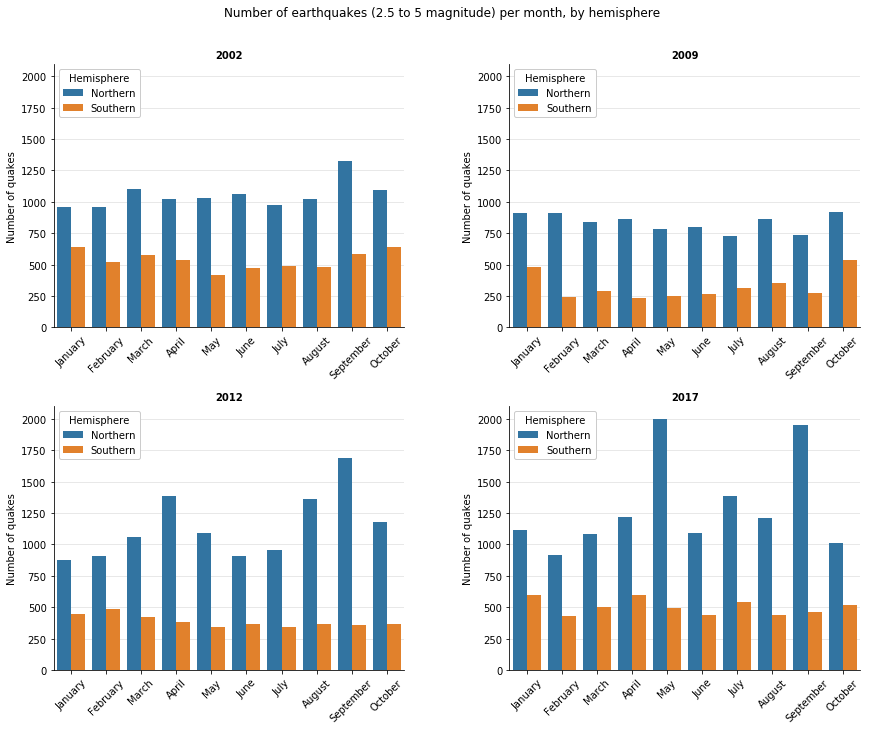

In [6]:
## Fig init
fig = plt.figure(figsize=(18,12))

#Factorplot!
g = sns.factorplot(x='month', hue='hemisphere', col='year', data=light_month, kind='count', 
                   col_wrap=2, size=5, aspect=1.2,legend=False)
#Labels on each ax, not just on the lower ones
for ax in g.axes:
    plt.setp(ax.set_xticklabels(light_month['month'].unique()), visible=True, rotation=45)
    plt.setp(ax.yaxis.grid(color='lightgray', linestyle='-', linewidth=0.5))
    plt.setp(ax.set_ylabel("Number of quakes"), rotation=90)
    plt.setp(ax.set_yticklabels(np.linspace(0,2000,9, dtype=int)), visible=True)
    plt.setp(ax.set_xlabel(""), visible=False)
    plt.setp(ax.legend(['Northern', 'Southern'], title="Hemisphere", loc=2, facecolor='white', frameon=True, framealpha=1)
             ,visible=True)
    plt.setp(ax.set_axisbelow(True))
    
    
g.set_titles("{col_name}", fontweight="bold")
plt.subplots_adjust(hspace = 0.3, wspace = 0.3, top=0.9)
g.fig.suptitle("Number of earthquakes (2.5 to 5 magnitude) per month, by hemisphere", fontsize=12)
plt.savefig("img/by_hemisphere_light.png",bbox_inches="tight")
None

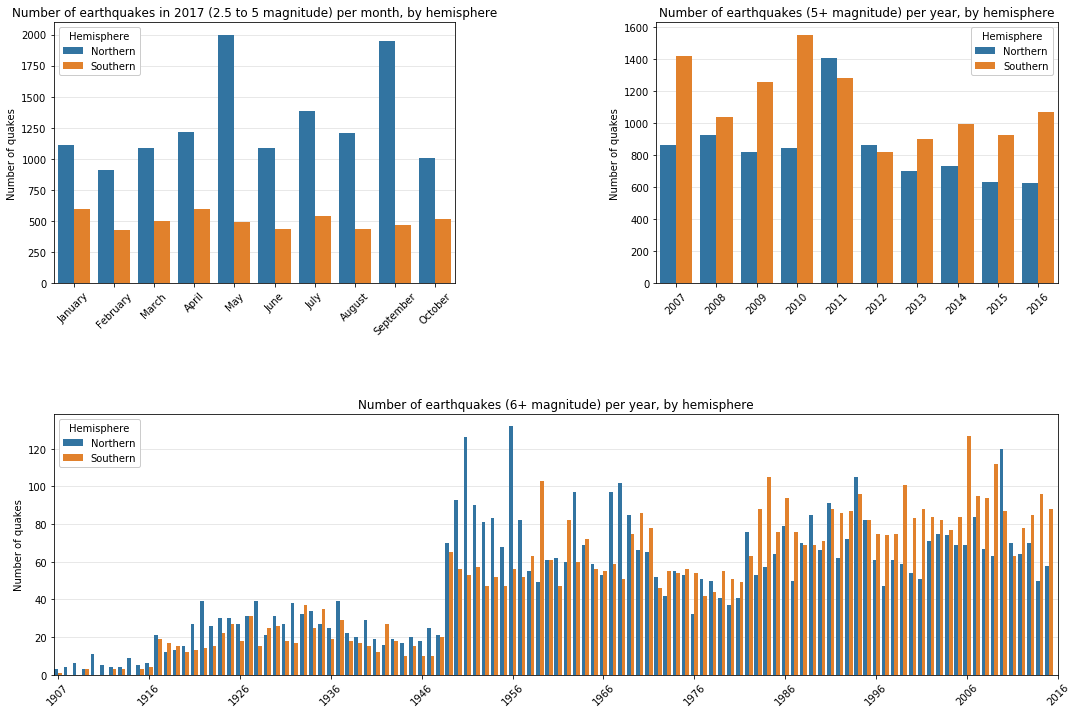

In [7]:
#Fig init
fig = plt.figure(figsize=(18,12))

#Gridspec for subplot placement
gs = gridspec.GridSpec(2,2, wspace=0.5, hspace=0.5)
ax_month = plt.subplot(gs[0,0])
ax_decade = plt.subplot(gs[0,1])
ax_century = plt.subplot(gs[1, :])


#Low+ mag, 2017, split per month
sns.countplot(x='month', hue='hemisphere', data=light_month[light_month['year'] == '2017'], ax=ax_month)
ax_month.set_xticklabels(light_month['month'].unique(), rotation=45)
ax_month.yaxis.grid(color='lightgray', linestyle='-', linewidth=0.5)
ax_month.set_axisbelow(True)
ax_month.set_xlabel("")
ax_month.set_ylabel("Number of quakes", rotation=90)
ax_month.legend(['Northern', 'Southern'], title="Hemisphere", facecolor='white', frameon=True, framealpha=1)
ax_month.set_title("Number of earthquakes in 2017 (2.5 to 5 magnitude) per month, by hemisphere")

#Med+ mag, split per year
sns.countplot(x='year', hue='hemisphere', data=medium_decade, ax=ax_decade)
ax_decade.set_xticklabels(medium_decade['year'].unique(), rotation=45)
ax_decade.yaxis.grid(color='lightgray', linestyle='-', linewidth=0.5)
ax_decade.set_axisbelow(True)
ax_decade.set_xlabel("")
ax_decade.set_ylabel("Number of quakes", rotation=90)
ax_decade.legend(['Northern', 'Southern'], title="Hemisphere", facecolor='white', frameon=True, framealpha=1)
ax_decade.set_title("Number of earthquakes (5+ magnitude) per year, by hemisphere")

#Heavy+ mag, split per year
sns.countplot(x='year', hue='hemisphere', data=heavy_century, ax=ax_century)
ax_century.set_xticks(np.linspace(0, 110, num=12, dtype=int))
ax_century.set_xticklabels(np.linspace(1907, 2016, num=12, dtype=int), rotation=45)
ax_century.yaxis.grid(color='lightgray', linestyle='-', linewidth=0.5)
ax_century.set_xlabel("")
ax_century.set_ylabel("Number of quakes", rotation=90)
ax_century.legend(['Northern', 'Southern'], title="Hemisphere", loc=2, facecolor='white', frameon=True, framealpha=1)
ax_century.set_title("Number of earthquakes (6+ magnitude) per year, by hemisphere")
ax_century.set_axisbelow(True)

plt.savefig("img/by_hemisphere_all.png",bbox_inches="tight")

## Measurement locations
<br>
<b>Seismographic stations per 03-2018</b> (Source: <a href="http://www.isc.ac.uk">International Seismological Centre</a>)
___
<div align=center><img src="img/station_registry.png" align=center></div>

___
- It would appear there are many more seismographic stations on the northern hemisphere. This could greatly influence observations. This observation is verified using the code snippet below.


In [8]:
#Don't run this too often, the URL in question is slow!
file_url = "http://seisan.ird.nc/USGS/mirror/neic.usgs.gov/neis/gis/station_comma_list.txt"

stations_package = requests.get(file_url)

In [9]:
#Aggregate and count
stations = pd.read_csv(io.StringIO(stations_package.text))
stations['hemisphere'] = np.where(stations['LATITUDE'] >= 0, 'northern', 'southern')
station_hemispheres = stations.groupby('hemisphere').describe()['ELEVATION']['count']
print("Stations on northern hemisphere: {}".format(int(station_hemispheres[0])))
print("Stations on southern hemisphere: {}".format(int(station_hemispheres[1])))

Stations on northern hemisphere: 10503
Stations on southern hemisphere: 1455


### 2. At what depth does the majority of earthquakes occur?

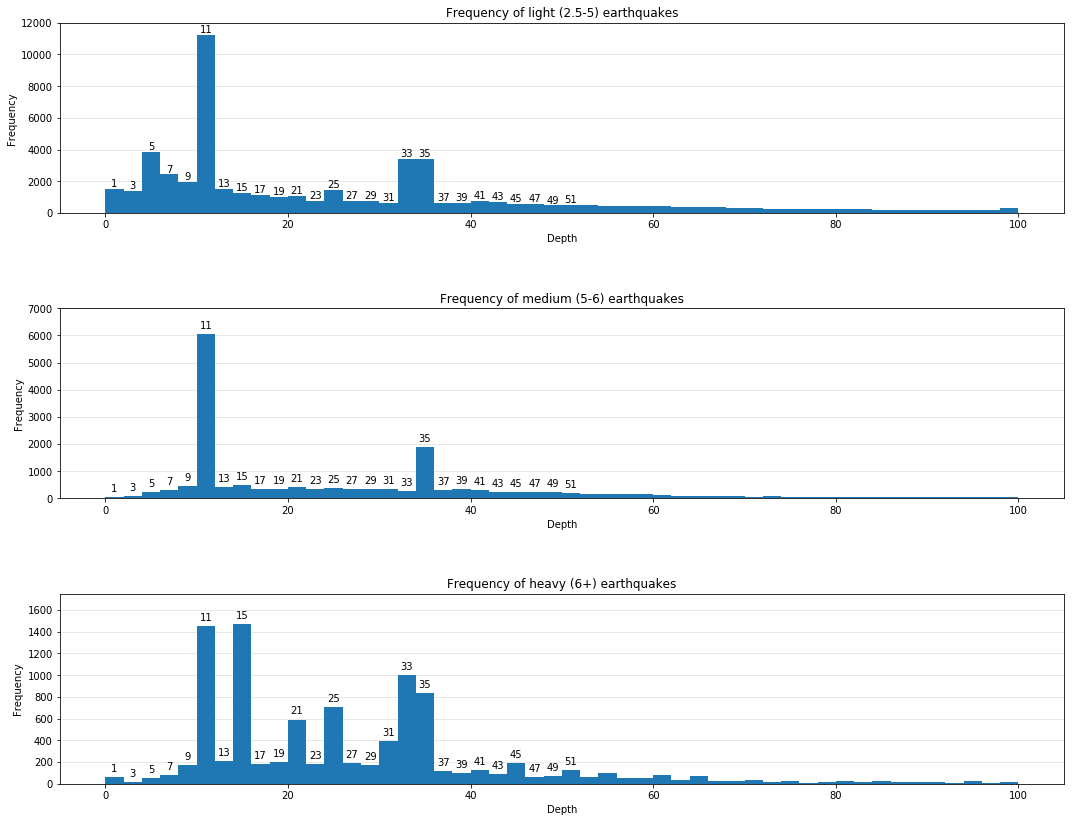

In [11]:
fig = plt.figure(figsize=(18,14))

gs2 = gridspec.GridSpec(3,1, wspace=0.5, hspace=0.5)
ax_light = plt.subplot(gs2[0,:])
ax_medium = plt.subplot(gs2[1,:])
ax_heavy = plt.subplot(gs2[2, :])


num_bins = 50

# Hist of light quakes
n, bins, patches = ax_light.hist(light_month['depth'], num_bins, range=(0,100))
for rect in patches: 
    if rect.get_x()<51:
        x_value = rect.get_x() + rect.get_width() / 2
        y_value = rect.get_height()+150
        label = int(x_value)
        ax_light.annotate(label, (x_value, y_value), ha='center', xytext=(x_value, y_value+0.5))
ax_light.set_xlabel('Depth')
ax_light.set_ylabel('Frequency')
ax_light.yaxis.grid(color='lightgray', linestyle='-', linewidth=0.5)
ax_light.set_axisbelow(True)
ax_light.set_ylim(0,12000)
ax_light.set_title("Frequency of light (2.5-5) earthquakes")


#Medium
n, bins, patches = ax_medium.hist(medium_decade['depth'], num_bins, range=(0,100))
for rect in patches: 
    if rect.get_x()<51:
        x_value = rect.get_x() + rect.get_width() / 2
        y_value = rect.get_height()+200
        label = int(x_value)
        ax_medium.annotate(label, (x_value, y_value), ha='center', xytext=(x_value, y_value+0.5))
ax_medium.set_xlabel('Depth')
ax_medium.set_ylabel('Frequency')
ax_medium.yaxis.grid(color='lightgray', linestyle='-', linewidth=0.5)
ax_medium.set_axisbelow(True)
ax_medium.set_ylim(0,7000)
ax_medium.set_title("Frequency of medium (5-6) earthquakes")

# Heavy
n, bins, patches = ax_heavy.hist(heavy_century['depth'], num_bins, range=(0,100))
for rect in patches: 
    if rect.get_x()<51:
        x_value = rect.get_x() + rect.get_width() / 2
        y_value = rect.get_height()+50
        label = int(x_value)
        ax_heavy.annotate(label, (x_value, y_value), ha='center', xytext=(x_value, y_value+0.5))
ax_heavy.set_xlabel('Depth')
ax_heavy.set_ylabel('Frequency')
ax_heavy.yaxis.grid(color='lightgray', linestyle='-', linewidth=0.5)
ax_heavy.set_axisbelow(True)
ax_heavy.set_ylim(0,1750)
ax_heavy.set_title("Frequency of heavy (6+) earthquakes")
plt.savefig("img/depth_freq", bbox_inches="tight")
None

### 3. Has the number of earthquakes (per month or year) near Haiti increased significantly since 2010?

In [12]:
#Grab dataset of all 2.5+ mag earthquakes in a 150km radius around Haiti
base_url = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&"

data_haiti = requests.get(base_url + 
                         "starttime=1967-01-01&" + "endtime=2018-01-01&" + 
                         "minmagnitude=2.5&" +
                        "latitude=19.203206&" + "longitude=-72.456568&" + 
                        "maxradiuskm=150")

data_haiti = pd.read_csv(io.StringIO(data_haiti.text))

In [13]:
#Again, reverse order for a chronological dataframe
data_haiti = data_haiti[::-1]
data_haiti['time'] = pd.to_datetime(data_haiti['time'])
data_haiti['year'] = [x.strftime("%Y") for x in data_haiti['time']]
count_haiti = data_haiti.groupby('year').describe()['depth']['count']

In [14]:
#Manually instantiated list of colors for plotting
color_options_haiti = ['#ffff00','#ffd800','#ffb400','#fa9200','#ee7200','#df5500','#cd3a00','#b92102','#a30a02','#8b0000']

In [2]:
def colorpicker_haiti(value_arr, colors):
    '''
    Manually ensure that the colors array is the length of the number of unique values to plot PLUS ONE. 
    Will manually assign the last (usually darkest) color in the colors array to the top value of the chart. 
    In all other cases, colors are picked based on bar height. 
    Not foolproof but quick and easy, and a manual implementation is a good learning tool.
    '''
    top = np.max(value_arr)
    palette_arr = []
    for x in value_arr: 
        if x < top: 
            palette_arr.append(colors[int(x)])
        else: 
            palette_arr.append(colors[-1])
    return palette_arr

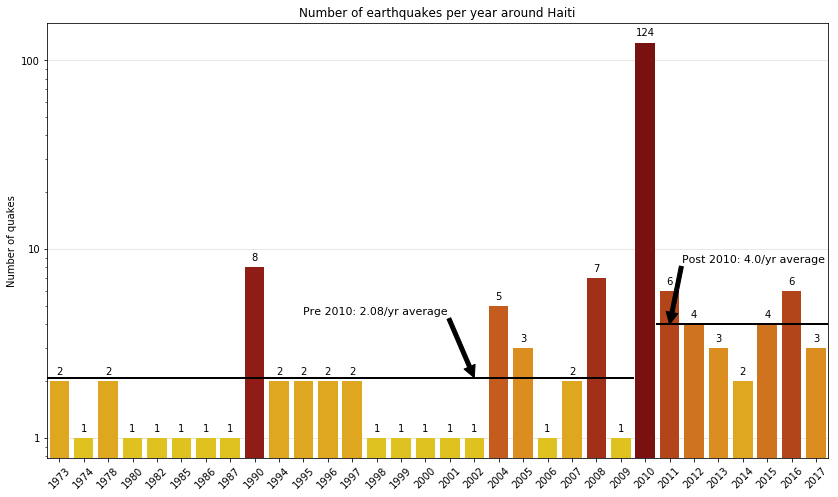

In [16]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

#Countplot
#Maroon for all years above the pre-2010 average
sns.countplot(x='year', data=data_haiti, ax=ax, 
              palette=colorpicker_haiti(count_haiti.values, color_options_haiti))

#Y axis
ax.set_yscale('log')
#Format y tick values as number
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_ylabel("Number of quakes")

#X axis 
ax.set_xlabel("")
ax.set_xticklabels(count_haiti.index, rotation=45)

#Grid
ax.yaxis.grid(color='lightgray', linestyle='-', linewidth=0.5 )
ax.set_axisbelow(True)

ax.set_title("Number of earthquakes per year around Haiti")

#Visualising means
ax.axhline(y=count_haiti['1973':'2009'].mean(), xmin=0, xmax=0.75, color='k', linewidth= 2)
ax.axhline(y=count_haiti['2011':].mean(), xmin=0.78125, xmax=1, color='k', linewidth=2)
ax.annotate('Pre 2010: 2.08/yr average', xy=(17, count_haiti['1973':'2009'].mean()), 
            xytext=(10, 4.5), fontsize=11, 
           arrowprops=dict(facecolor='black'))
ax.annotate('Post 2010: 4.0/yr average', xy=(25, count_haiti['2011':].mean()), 
            xytext=(25.5, 8.5), fontsize=11, 
           arrowprops=dict(facecolor='black'))

#Bar labels
rects = ax.patches
for rect in rects: 
    x_value = rect.get_x() + rect.get_width() / 2
    y_value = rect.get_height()
    label = int(y_value)
    ax.annotate(label, (x_value, y_value), ha='center', xytext=(x_value, y_value + (y_value/12)))
plt.savefig("img/haiti.png", bbox_inches="tight")
None


### 4. Has the number of earthquakes (per month or year) near Kathmandu increased significantly since 2015?

In [17]:
#Grab dataset of all 2.5+ mag earthquakes in a 100km radius around Kathmandu
base_url = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&"

data_nepal = requests.get(base_url + 
                         "starttime=1967-01-01&" + "endtime=2018-01-01&" + 
                         "minmagnitude=2.5&" +
                        "latitude=27.723545&" + "longitude=85.319609&" + 
                        "maxradiuskm=100")

data_nepal = pd.read_csv(io.StringIO(data_nepal.text))


In [18]:
#Again, reverse order for a chronological dataframe
data_nepal = data_nepal[::-1]
data_nepal['time'] = pd.to_datetime(data_nepal['time'])
data_nepal['year'] = [x.strftime("%Y") for x in data_nepal['time']]
count_nepal = data_nepal.groupby('year').describe()['depth']['count']

In [19]:
color_options_nepal = ['#ffff00','#ffcd00','#fda000','#f07600','#dc5100','#c42f01','#a91102','#8b0000']

In [20]:
def colorpicker_nepal(value_arr, colors):
    '''
    Manually ensure that the colors array is the length of the number of unique values to plot PLUS ONE. 
    Will manually assign the last (usually darkest) color in the colors array to the top value of the chart. 
    In all other cases, colors are picked based on bar height. 
    Not foolproof but quick and easy. In its current state cant be applied on other charts without alterations.
    '''
    top = np.max(value_arr)
    palette_arr = []
    for x in value_arr: 
        if (int(x)) == 22:  #this is garbage, fix if time allows
            palette_arr.append(colors[-2])
        elif x < top: 
            palette_arr.append(colors[int(x)])
        else: 
            palette_arr.append(colors[-1])
    return palette_arr


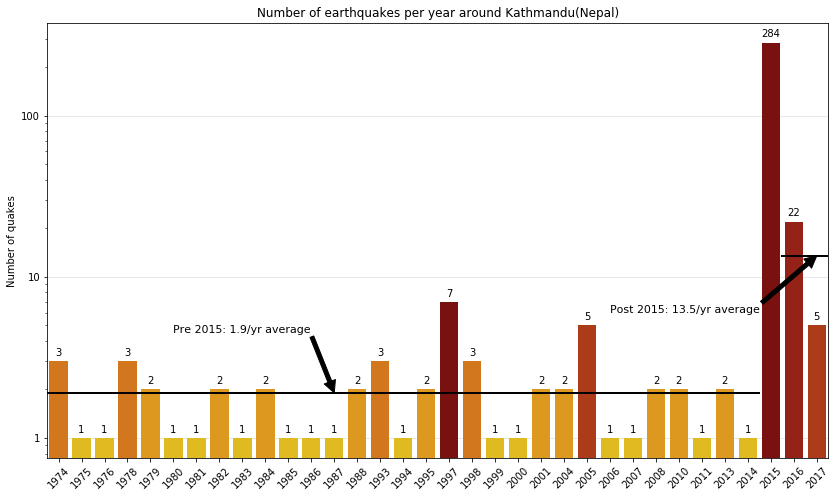

In [21]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

#Countplot
#Maroon for all years above the pre-2010 average
sns.countplot(x='year', data=data_nepal, ax=ax, 
              palette=colorpicker_nepal(count_nepal.values, color_options_nepal))

#Y axis
ax.set_yscale('log')
#Format y tick values as number
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_ylabel("Number of quakes")

#X axis 
ax.set_xlabel("")
ax.set_xticklabels(count_nepal.index, rotation=45)

#Grid
ax.yaxis.grid(color='lightgray', linestyle='-', linewidth=0.5 )
ax.set_axisbelow(True)

ax.set_title("Number of earthquakes per year around Kathmandu(Nepal)")

#Visualising means
ax.axhline(y=count_nepal['1973':'2014'].mean(), xmin=0, xmax=0.911, color='k', linewidth= 2)
ax.axhline(y=count_nepal['2016':].mean(), xmin=0.941, xmax=1, color='k', linewidth=2)
ax.annotate('Pre 2015: 1.9/yr average', xy=(12, count_nepal['1973':'2014'].mean()), 
            xytext=(5, 4.5), fontsize=11, 
           arrowprops=dict(facecolor='black'))
ax.annotate('Post 2015: 13.5/yr average', xy=(33, count_nepal['2016':].mean()), 
            xytext=(24, 6), fontsize=11, 
           arrowprops=dict(facecolor='black'))

#Bar labels
rects = ax.patches
for rect in rects: 
    x_value = rect.get_x() + rect.get_width() / 2
    y_value = rect.get_height()
    label = int(y_value)
    ax.annotate(label, (x_value, y_value), ha='center', xytext=(x_value, y_value + (y_value/12)))
plt.savefig("img/nepal.png", bbox_inches="tight")

None